In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)

# Target density #

In [4]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

size_sample

200

# Generative Network #

In [5]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=10


GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [6]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=100#size_sample

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .01, .00001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 89085.109375, Entropy -136.28012084960938, Learning Rate: 0.01
Epoch [1/20000], Loss: 49890.625, Entropy -161.16110229492188, Learning Rate: 0.01
Epoch [2/20000], Loss: 44728.87890625, Entropy -158.67172241210938, Learning Rate: 0.01
Epoch [3/20000], Loss: 54355.94140625, Entropy -159.9581756591797, Learning Rate: 0.01
Epoch [4/20000], Loss: 41568.1171875, Entropy -161.0608673095703, Learning Rate: 0.01
Epoch [5/20000], Loss: 42649.35546875, Entropy -160.11581420898438, Learning Rate: 0.01
Epoch [6/20000], Loss: 29307.619140625, Entropy -177.43450927734375, Learning Rate: 0.01
Epoch [7/20000], Loss: 28979.43359375, Entropy -177.1561279296875, Learning Rate: 0.01
Epoch [8/20000], Loss: 28084.8046875, Entropy -174.587890625, Learning Rate: 0.01
Epoch [9/20000], Loss: 32022.875, Entropy -176.0665283203125, Learning Rate: 0.01
Epoch [10/20000], Loss: 30892.572265625, Entropy -190.51048278808594, Learning Rate: 0.01
Epoch [11/20000], Loss: 22867.255859375, Entropy -18

Epoch [95/20000], Loss: 1798.3905029296875, Entropy -319.3904724121094, Learning Rate: 0.01
Epoch [96/20000], Loss: 1912.939697265625, Entropy -328.7568664550781, Learning Rate: 0.01
Epoch [97/20000], Loss: 1978.002685546875, Entropy -318.2452392578125, Learning Rate: 0.01
Epoch [98/20000], Loss: 1794.4052734375, Entropy -337.9788818359375, Learning Rate: 0.01
Epoch [99/20000], Loss: 1995.725830078125, Entropy -328.2762451171875, Learning Rate: 0.01
Epoch [100/20000], Loss: 2025.750244140625, Entropy -337.30291748046875, Learning Rate: 0.01
Epoch [101/20000], Loss: 1919.2333984375, Entropy -325.9880676269531, Learning Rate: 0.01
Epoch [102/20000], Loss: 1985.9600830078125, Entropy -319.90447998046875, Learning Rate: 0.01
Epoch [103/20000], Loss: 2071.483642578125, Entropy -314.2118225097656, Learning Rate: 0.01
Epoch [104/20000], Loss: 1696.9681396484375, Entropy -340.02716064453125, Learning Rate: 0.01
Epoch [105/20000], Loss: 1999.2279052734375, Entropy -327.78363037109375, Learning 

Epoch [188/20000], Loss: 1680.5211181640625, Entropy -317.638671875, Learning Rate: 0.01
Epoch [189/20000], Loss: 1629.5357666015625, Entropy -335.58758544921875, Learning Rate: 0.01
Epoch [190/20000], Loss: 1494.0672607421875, Entropy -326.2001647949219, Learning Rate: 0.01
Epoch [191/20000], Loss: 1599.5201416015625, Entropy -328.001708984375, Learning Rate: 0.01
Epoch [192/20000], Loss: 1585.463623046875, Entropy -325.571533203125, Learning Rate: 0.01
Epoch [193/20000], Loss: 1641.484375, Entropy -333.9484558105469, Learning Rate: 0.01
Epoch [194/20000], Loss: 1644.2777099609375, Entropy -326.2671813964844, Learning Rate: 0.01
Epoch [195/20000], Loss: 1737.3441162109375, Entropy -325.3345031738281, Learning Rate: 0.01
Epoch [196/20000], Loss: 1626.23046875, Entropy -329.121337890625, Learning Rate: 0.01
Epoch [197/20000], Loss: 1456.265625, Entropy -328.5011901855469, Learning Rate: 0.01
Epoch [198/20000], Loss: 1579.00146484375, Entropy -323.97784423828125, Learning Rate: 0.01
Epoc

Epoch [279/20000], Loss: 1267.088134765625, Entropy -323.55999755859375, Learning Rate: 0.01
Epoch [280/20000], Loss: 1458.201904296875, Entropy -316.1460876464844, Learning Rate: 0.01
Epoch [281/20000], Loss: 1343.509521484375, Entropy -306.0685119628906, Learning Rate: 0.01
Epoch [282/20000], Loss: 1240.931396484375, Entropy -315.3670349121094, Learning Rate: 0.01
Epoch [283/20000], Loss: 1343.1796875, Entropy -321.6116943359375, Learning Rate: 0.01
Epoch [284/20000], Loss: 1329.9061279296875, Entropy -317.4237365722656, Learning Rate: 0.01
Epoch [285/20000], Loss: 1334.140380859375, Entropy -326.87158203125, Learning Rate: 0.01
Epoch [286/20000], Loss: 1245.87646484375, Entropy -325.5681457519531, Learning Rate: 0.01
Epoch [287/20000], Loss: 1285.4041748046875, Entropy -321.25836181640625, Learning Rate: 0.01
Epoch [288/20000], Loss: 1305.937744140625, Entropy -323.1769714355469, Learning Rate: 0.01
Epoch [289/20000], Loss: 1229.771484375, Entropy -315.79449462890625, Learning Rate:

Epoch [373/20000], Loss: 1009.3816528320312, Entropy -302.21826171875, Learning Rate: 0.01
Epoch [374/20000], Loss: 1131.904296875, Entropy -310.6736145019531, Learning Rate: 0.01
Epoch [375/20000], Loss: 1010.6746826171875, Entropy -307.0614929199219, Learning Rate: 0.01
Epoch [376/20000], Loss: 1065.6573486328125, Entropy -310.6112976074219, Learning Rate: 0.01
Epoch [377/20000], Loss: 1134.45947265625, Entropy -306.77386474609375, Learning Rate: 0.01
Epoch [378/20000], Loss: 1129.329833984375, Entropy -317.6338806152344, Learning Rate: 0.01
Epoch [379/20000], Loss: 1032.0523681640625, Entropy -299.53857421875, Learning Rate: 0.01
Epoch [380/20000], Loss: 1165.02099609375, Entropy -304.46771240234375, Learning Rate: 0.01
Epoch [381/20000], Loss: 1179.9071044921875, Entropy -297.8587951660156, Learning Rate: 0.01
Epoch [382/20000], Loss: 1116.1619873046875, Entropy -301.7459716796875, Learning Rate: 0.01
Epoch [383/20000], Loss: 1106.4718017578125, Entropy -309.18505859375, Learning R

Epoch [463/20000], Loss: 792.1941528320312, Entropy -308.0457458496094, Learning Rate: 0.01
Epoch [464/20000], Loss: 957.6594848632812, Entropy -299.06658935546875, Learning Rate: 0.01
Epoch [465/20000], Loss: 948.3997802734375, Entropy -299.2910461425781, Learning Rate: 0.01
Epoch [466/20000], Loss: 951.24560546875, Entropy -293.451904296875, Learning Rate: 0.01
Epoch [467/20000], Loss: 1063.5947265625, Entropy -302.0303039550781, Learning Rate: 0.01
Epoch [468/20000], Loss: 732.165771484375, Entropy -303.95068359375, Learning Rate: 0.01
Epoch [469/20000], Loss: 746.941162109375, Entropy -304.40826416015625, Learning Rate: 0.01
Epoch [470/20000], Loss: 852.3648681640625, Entropy -296.9445495605469, Learning Rate: 0.01
Epoch [471/20000], Loss: 869.423583984375, Entropy -290.62432861328125, Learning Rate: 0.01
Epoch [472/20000], Loss: 745.2137451171875, Entropy -305.75433349609375, Learning Rate: 0.01
Epoch [473/20000], Loss: 856.609130859375, Entropy -305.4410400390625, Learning Rate: 

Epoch [556/20000], Loss: 603.44287109375, Entropy -310.51092529296875, Learning Rate: 0.01
Epoch [557/20000], Loss: 553.4189453125, Entropy -311.9658508300781, Learning Rate: 0.01
Epoch [558/20000], Loss: 540.9277954101562, Entropy -297.9893798828125, Learning Rate: 0.01
Epoch [559/20000], Loss: 570.1697387695312, Entropy -309.96392822265625, Learning Rate: 0.01
Epoch [560/20000], Loss: 608.4542236328125, Entropy -304.10125732421875, Learning Rate: 0.01
Epoch [561/20000], Loss: 564.439697265625, Entropy -306.680908203125, Learning Rate: 0.01
Epoch [562/20000], Loss: 549.484130859375, Entropy -307.9053649902344, Learning Rate: 0.01
Epoch [563/20000], Loss: 647.13623046875, Entropy -318.9532470703125, Learning Rate: 0.01
Epoch [564/20000], Loss: 551.9668579101562, Entropy -312.0091552734375, Learning Rate: 0.01
Epoch [565/20000], Loss: 584.3524780273438, Entropy -301.763427734375, Learning Rate: 0.01
Epoch [566/20000], Loss: 650.4224853515625, Entropy -313.7913513183594, Learning Rate: 0

Epoch [649/20000], Loss: 473.5792236328125, Entropy -314.34332275390625, Learning Rate: 0.01
Epoch [650/20000], Loss: 502.8977966308594, Entropy -312.0518798828125, Learning Rate: 0.01
Epoch [651/20000], Loss: 501.81719970703125, Entropy -310.6452941894531, Learning Rate: 0.01
Epoch [652/20000], Loss: 560.114501953125, Entropy -307.1305236816406, Learning Rate: 0.01
Epoch [653/20000], Loss: 478.79119873046875, Entropy -309.1282043457031, Learning Rate: 0.01
Epoch [654/20000], Loss: 544.5543823242188, Entropy -306.753173828125, Learning Rate: 0.01
Epoch [655/20000], Loss: 525.9109497070312, Entropy -300.0104675292969, Learning Rate: 0.01
Epoch [656/20000], Loss: 535.0779418945312, Entropy -320.2261047363281, Learning Rate: 0.01
Epoch [657/20000], Loss: 495.71051025390625, Entropy -308.59423828125, Learning Rate: 0.01
Epoch [658/20000], Loss: 509.76251220703125, Entropy -311.86669921875, Learning Rate: 0.01
Epoch [659/20000], Loss: 588.265869140625, Entropy -310.4834289550781, Learning R

Epoch [740/20000], Loss: 507.2984619140625, Entropy -300.93475341796875, Learning Rate: 0.01
Epoch [741/20000], Loss: 445.4347839355469, Entropy -306.8363952636719, Learning Rate: 0.01
Epoch [742/20000], Loss: 441.7808532714844, Entropy -308.5944519042969, Learning Rate: 0.01
Epoch [743/20000], Loss: 459.0234069824219, Entropy -300.6339416503906, Learning Rate: 0.01
Epoch [744/20000], Loss: 475.2225036621094, Entropy -298.0064392089844, Learning Rate: 0.01
Epoch [745/20000], Loss: 446.44537353515625, Entropy -304.4190979003906, Learning Rate: 0.01
Epoch [746/20000], Loss: 424.1172180175781, Entropy -305.6619873046875, Learning Rate: 0.01
Epoch [747/20000], Loss: 452.4306640625, Entropy -313.7783203125, Learning Rate: 0.01
Epoch [748/20000], Loss: 456.53466796875, Entropy -299.579345703125, Learning Rate: 0.01
Epoch [749/20000], Loss: 494.5725402832031, Entropy -303.8283996582031, Learning Rate: 0.01
Epoch [750/20000], Loss: 426.0593566894531, Entropy -296.7239685058594, Learning Rate: 

Epoch [836/20000], Loss: 402.12713623046875, Entropy -304.7756652832031, Learning Rate: 0.01
Epoch [837/20000], Loss: 432.707275390625, Entropy -298.1007080078125, Learning Rate: 0.01
Epoch [838/20000], Loss: 390.9140625, Entropy -303.8779296875, Learning Rate: 0.01
Epoch [839/20000], Loss: 491.19683837890625, Entropy -305.9703674316406, Learning Rate: 0.01
Epoch [840/20000], Loss: 459.0841064453125, Entropy -310.8755187988281, Learning Rate: 0.01
Epoch [841/20000], Loss: 434.41619873046875, Entropy -305.7409362792969, Learning Rate: 0.01
Epoch [842/20000], Loss: 421.26910400390625, Entropy -309.8941345214844, Learning Rate: 0.01
Epoch [843/20000], Loss: 446.0752868652344, Entropy -295.4693298339844, Learning Rate: 0.01
Epoch [844/20000], Loss: 425.062744140625, Entropy -303.3408508300781, Learning Rate: 0.01
Epoch [845/20000], Loss: 431.7080383300781, Entropy -306.7557067871094, Learning Rate: 0.01
Epoch [846/20000], Loss: 430.55426025390625, Entropy -302.69427490234375, Learning Rate

Epoch [926/20000], Loss: 377.2156982421875, Entropy -305.57220458984375, Learning Rate: 0.01
Epoch [927/20000], Loss: 374.24456787109375, Entropy -298.1004638671875, Learning Rate: 0.01
Epoch [928/20000], Loss: 389.873046875, Entropy -307.0273132324219, Learning Rate: 0.01
Epoch [929/20000], Loss: 373.3970947265625, Entropy -302.01171875, Learning Rate: 0.01
Epoch [930/20000], Loss: 368.7176818847656, Entropy -303.95440673828125, Learning Rate: 0.01
Epoch [931/20000], Loss: 411.636474609375, Entropy -296.4813537597656, Learning Rate: 0.01
Epoch [932/20000], Loss: 395.028076171875, Entropy -295.0154113769531, Learning Rate: 0.01
Epoch [933/20000], Loss: 413.4057312011719, Entropy -305.8996887207031, Learning Rate: 0.01
Epoch [934/20000], Loss: 444.5777893066406, Entropy -298.8409423828125, Learning Rate: 0.01
Epoch [935/20000], Loss: 430.3473815917969, Entropy -295.05364990234375, Learning Rate: 0.01
Epoch [936/20000], Loss: 424.95355224609375, Entropy -300.84832763671875, Learning Rate

Epoch [1019/20000], Loss: 378.5650634765625, Entropy -302.3364562988281, Learning Rate: 0.01
Epoch [1020/20000], Loss: 355.5525207519531, Entropy -295.81854248046875, Learning Rate: 0.01
Epoch [1021/20000], Loss: 360.90863037109375, Entropy -285.7655334472656, Learning Rate: 0.01
Epoch [1022/20000], Loss: 408.14788818359375, Entropy -301.5827331542969, Learning Rate: 0.01
Epoch [1023/20000], Loss: 373.4361572265625, Entropy -299.1121826171875, Learning Rate: 0.01
Epoch [1024/20000], Loss: 387.00885009765625, Entropy -309.55328369140625, Learning Rate: 0.01
Epoch [1025/20000], Loss: 392.57196044921875, Entropy -290.30645751953125, Learning Rate: 0.01
Epoch [1026/20000], Loss: 369.63763427734375, Entropy -312.4107971191406, Learning Rate: 0.01
Epoch [1027/20000], Loss: 353.6659240722656, Entropy -291.81109619140625, Learning Rate: 0.01
Epoch [1028/20000], Loss: 361.338134765625, Entropy -289.7742614746094, Learning Rate: 0.01
Epoch [1029/20000], Loss: 363.97467041015625, Entropy -305.503

Epoch [1108/20000], Loss: 349.3965759277344, Entropy -290.7292785644531, Learning Rate: 0.01
Epoch [1109/20000], Loss: 364.61981201171875, Entropy -300.8970031738281, Learning Rate: 0.01
Epoch [1110/20000], Loss: 335.162353515625, Entropy -298.7696228027344, Learning Rate: 0.01
Epoch [1111/20000], Loss: 355.9797668457031, Entropy -293.11029052734375, Learning Rate: 0.01
Epoch [1112/20000], Loss: 315.9027404785156, Entropy -283.7261962890625, Learning Rate: 0.01
Epoch [1113/20000], Loss: 405.91351318359375, Entropy -301.93157958984375, Learning Rate: 0.01
Epoch [1114/20000], Loss: 345.13690185546875, Entropy -293.3191223144531, Learning Rate: 0.01
Epoch [1115/20000], Loss: 380.33563232421875, Entropy -289.6327209472656, Learning Rate: 0.01
Epoch [1116/20000], Loss: 342.3551025390625, Entropy -300.17071533203125, Learning Rate: 0.01
Epoch [1117/20000], Loss: 326.50396728515625, Entropy -285.8707275390625, Learning Rate: 0.01
Epoch [1118/20000], Loss: 391.4093017578125, Entropy -288.67150

Epoch [1197/20000], Loss: 319.069091796875, Entropy -280.4422607421875, Learning Rate: 0.01
Epoch [1198/20000], Loss: 317.4502258300781, Entropy -274.559814453125, Learning Rate: 0.01
Epoch [1199/20000], Loss: 324.59906005859375, Entropy -298.12353515625, Learning Rate: 0.01
Epoch [1200/20000], Loss: 322.2686462402344, Entropy -297.64678955078125, Learning Rate: 0.01
Epoch [1201/20000], Loss: 331.8499450683594, Entropy -277.4972229003906, Learning Rate: 0.01
Epoch [1202/20000], Loss: 325.81622314453125, Entropy -288.2611083984375, Learning Rate: 0.01
Epoch [1203/20000], Loss: 343.6490478515625, Entropy -299.1167907714844, Learning Rate: 0.01
Epoch [1204/20000], Loss: 306.897216796875, Entropy -293.569580078125, Learning Rate: 0.01
Epoch [1205/20000], Loss: 362.26080322265625, Entropy -299.71368408203125, Learning Rate: 0.01
Epoch [1206/20000], Loss: 371.24951171875, Entropy -290.4444274902344, Learning Rate: 0.01
Epoch [1207/20000], Loss: 356.459228515625, Entropy -287.96759033203125, 

Epoch [1286/20000], Loss: 325.0377502441406, Entropy -279.6839599609375, Learning Rate: 0.01
Epoch [1287/20000], Loss: 371.3866271972656, Entropy -279.66656494140625, Learning Rate: 0.01
Epoch [1288/20000], Loss: 417.7072448730469, Entropy -300.3462829589844, Learning Rate: 0.01
Epoch [1289/20000], Loss: 352.6400146484375, Entropy -292.41058349609375, Learning Rate: 0.01
Epoch [1290/20000], Loss: 441.058837890625, Entropy -284.2987060546875, Learning Rate: 0.01
Epoch [1291/20000], Loss: 563.3292236328125, Entropy -283.3150329589844, Learning Rate: 0.01
Epoch [1292/20000], Loss: 351.64324951171875, Entropy -287.99334716796875, Learning Rate: 0.01
Epoch [1293/20000], Loss: 396.1650085449219, Entropy -284.8944091796875, Learning Rate: 0.01
Epoch [1294/20000], Loss: 446.8260498046875, Entropy -274.3955078125, Learning Rate: 0.01
Epoch [1295/20000], Loss: 383.65472412109375, Entropy -280.8855285644531, Learning Rate: 0.01
Epoch [1296/20000], Loss: 338.1208801269531, Entropy -283.69274902343

Epoch [1376/20000], Loss: 291.687744140625, Entropy -275.11669921875, Learning Rate: 0.01
Epoch [1377/20000], Loss: 309.2670593261719, Entropy -286.72149658203125, Learning Rate: 0.01
Epoch [1378/20000], Loss: 328.14788818359375, Entropy -282.1130676269531, Learning Rate: 0.01
Epoch [1379/20000], Loss: 289.87811279296875, Entropy -279.5465087890625, Learning Rate: 0.01
Epoch [1380/20000], Loss: 296.84918212890625, Entropy -282.0206298828125, Learning Rate: 0.01
Epoch [1381/20000], Loss: 326.1874694824219, Entropy -289.7647705078125, Learning Rate: 0.01
Epoch [1382/20000], Loss: 287.89227294921875, Entropy -283.2535705566406, Learning Rate: 0.01
Epoch [1383/20000], Loss: 322.32794189453125, Entropy -296.7508239746094, Learning Rate: 0.01
Epoch [1384/20000], Loss: 320.1363525390625, Entropy -287.6680908203125, Learning Rate: 0.01
Epoch [1385/20000], Loss: 306.4442443847656, Entropy -286.46636962890625, Learning Rate: 0.01
Epoch [1386/20000], Loss: 293.142822265625, Entropy -284.598632812

Epoch [1469/20000], Loss: 280.91796875, Entropy -271.9715270996094, Learning Rate: 0.01
Epoch [1470/20000], Loss: 317.8755798339844, Entropy -288.78472900390625, Learning Rate: 0.01
Epoch [1471/20000], Loss: 304.5879821777344, Entropy -284.91510009765625, Learning Rate: 0.01
Epoch [1472/20000], Loss: 302.3880310058594, Entropy -279.3114318847656, Learning Rate: 0.01
Epoch [1473/20000], Loss: 304.33740234375, Entropy -277.1700439453125, Learning Rate: 0.01
Epoch [1474/20000], Loss: 304.76129150390625, Entropy -272.79840087890625, Learning Rate: 0.01
Epoch [1475/20000], Loss: 289.7817687988281, Entropy -274.57427978515625, Learning Rate: 0.01
Epoch [1476/20000], Loss: 304.6180419921875, Entropy -286.97711181640625, Learning Rate: 0.01
Epoch [1477/20000], Loss: 362.2147521972656, Entropy -276.415771484375, Learning Rate: 0.01
Epoch [1478/20000], Loss: 340.32623291015625, Entropy -275.46832275390625, Learning Rate: 0.01
Epoch [1479/20000], Loss: 298.3951110839844, Entropy -291.553894042968

Epoch [1561/20000], Loss: 738.56689453125, Entropy -273.7005310058594, Learning Rate: 0.01
Epoch [1562/20000], Loss: 465.705078125, Entropy -277.6795654296875, Learning Rate: 0.01
Epoch [1563/20000], Loss: 475.57904052734375, Entropy -275.26068115234375, Learning Rate: 0.01
Epoch [1564/20000], Loss: 400.6473693847656, Entropy -281.2041015625, Learning Rate: 0.01
Epoch [1565/20000], Loss: 360.9371337890625, Entropy -265.2735290527344, Learning Rate: 0.01
Epoch [1566/20000], Loss: 402.4032897949219, Entropy -267.81524658203125, Learning Rate: 0.01
Epoch [1567/20000], Loss: 585.7222290039062, Entropy -270.57098388671875, Learning Rate: 0.01
Epoch [1568/20000], Loss: 697.658935546875, Entropy -269.521240234375, Learning Rate: 0.01
Epoch [1569/20000], Loss: 524.4517822265625, Entropy -277.75433349609375, Learning Rate: 0.01
Epoch [1570/20000], Loss: 791.9850463867188, Entropy -282.54638671875, Learning Rate: 0.01
Epoch [1571/20000], Loss: 371.1376647949219, Entropy -274.21466064453125, Lear

Epoch [1651/20000], Loss: 345.0693054199219, Entropy -273.9559326171875, Learning Rate: 0.01
Epoch [1652/20000], Loss: 307.31195068359375, Entropy -267.3170166015625, Learning Rate: 0.01
Epoch [1653/20000], Loss: 275.19866943359375, Entropy -277.9290466308594, Learning Rate: 0.01
Epoch [1654/20000], Loss: 310.4690856933594, Entropy -282.7070007324219, Learning Rate: 0.01
Epoch [1655/20000], Loss: 276.6147155761719, Entropy -278.1032409667969, Learning Rate: 0.01
Epoch [1656/20000], Loss: 274.775634765625, Entropy -283.0684814453125, Learning Rate: 0.01
Epoch [1657/20000], Loss: 296.4366149902344, Entropy -273.5942687988281, Learning Rate: 0.01
Epoch [1658/20000], Loss: 263.08251953125, Entropy -275.93701171875, Learning Rate: 0.01
Epoch [1659/20000], Loss: 272.278076171875, Entropy -271.15216064453125, Learning Rate: 0.01
Epoch [1660/20000], Loss: 275.50390625, Entropy -280.324951171875, Learning Rate: 0.01
Epoch [1661/20000], Loss: 273.2162170410156, Entropy -282.229248046875, Learnin

Epoch [1740/20000], Loss: 260.21636962890625, Entropy -274.30828857421875, Learning Rate: 0.01
Epoch [1741/20000], Loss: 274.57977294921875, Entropy -281.7615661621094, Learning Rate: 0.01
Epoch [1742/20000], Loss: 262.08306884765625, Entropy -270.6748046875, Learning Rate: 0.01
Epoch [1743/20000], Loss: 301.5649108886719, Entropy -281.8471984863281, Learning Rate: 0.01
Epoch [1744/20000], Loss: 252.22601318359375, Entropy -270.1849365234375, Learning Rate: 0.01
Epoch [1745/20000], Loss: 293.5733337402344, Entropy -279.2743835449219, Learning Rate: 0.01
Epoch [1746/20000], Loss: 287.4068908691406, Entropy -263.6633605957031, Learning Rate: 0.01
Epoch [1747/20000], Loss: 261.0028076171875, Entropy -272.3326110839844, Learning Rate: 0.01
Epoch [1748/20000], Loss: 269.5245361328125, Entropy -272.35699462890625, Learning Rate: 0.01
Epoch [1749/20000], Loss: 263.674560546875, Entropy -272.9138488769531, Learning Rate: 0.01
Epoch [1750/20000], Loss: 257.3985595703125, Entropy -265.4976196289

Epoch [1832/20000], Loss: 298.65374755859375, Entropy -274.058349609375, Learning Rate: 0.01
Epoch [1833/20000], Loss: 381.8087463378906, Entropy -272.54132080078125, Learning Rate: 0.01
Epoch [1834/20000], Loss: 428.8969421386719, Entropy -270.921630859375, Learning Rate: 0.01
Epoch [1835/20000], Loss: 340.5280456542969, Entropy -263.3376159667969, Learning Rate: 0.01
Epoch [1836/20000], Loss: 339.8699035644531, Entropy -268.7764587402344, Learning Rate: 0.01
Epoch [1837/20000], Loss: 485.11334228515625, Entropy -268.329833984375, Learning Rate: 0.01
Epoch [1838/20000], Loss: 304.137939453125, Entropy -272.2554931640625, Learning Rate: 0.01
Epoch [1839/20000], Loss: 351.7755126953125, Entropy -271.28472900390625, Learning Rate: 0.01
Epoch [1840/20000], Loss: 390.54608154296875, Entropy -273.4028625488281, Learning Rate: 0.01
Epoch [1841/20000], Loss: 295.8435974121094, Entropy -276.3013610839844, Learning Rate: 0.01
Epoch [1842/20000], Loss: 348.3616943359375, Entropy -273.28894042968

Epoch [1922/20000], Loss: 241.3329620361328, Entropy -271.1288146972656, Learning Rate: 0.005
Epoch [1923/20000], Loss: 240.3331298828125, Entropy -269.533203125, Learning Rate: 0.005
Epoch [1924/20000], Loss: 234.73529052734375, Entropy -259.143310546875, Learning Rate: 0.005
Epoch [1925/20000], Loss: 251.1017303466797, Entropy -278.3334045410156, Learning Rate: 0.005
Epoch [1926/20000], Loss: 244.66143798828125, Entropy -270.5467224121094, Learning Rate: 0.005
Epoch [1927/20000], Loss: 235.80899047851562, Entropy -259.99298095703125, Learning Rate: 0.005
Epoch [1928/20000], Loss: 236.7686767578125, Entropy -268.3791198730469, Learning Rate: 0.005
Epoch [1929/20000], Loss: 244.79884338378906, Entropy -270.8168029785156, Learning Rate: 0.005
Epoch [1930/20000], Loss: 248.93597412109375, Entropy -270.4076232910156, Learning Rate: 0.005
Epoch [1931/20000], Loss: 251.74559020996094, Entropy -268.8642883300781, Learning Rate: 0.005
Epoch [1932/20000], Loss: 244.73403930664062, Entropy -281

Epoch [2014/20000], Loss: 238.20635986328125, Entropy -265.373046875, Learning Rate: 0.005
Epoch [2015/20000], Loss: 224.821044921875, Entropy -255.99827575683594, Learning Rate: 0.005
Epoch [2016/20000], Loss: 226.5830841064453, Entropy -258.2346496582031, Learning Rate: 0.005
Epoch [2017/20000], Loss: 234.92636108398438, Entropy -263.9459228515625, Learning Rate: 0.005
Epoch [2018/20000], Loss: 241.92498779296875, Entropy -278.61199951171875, Learning Rate: 0.005
Epoch [2019/20000], Loss: 230.1602783203125, Entropy -254.42498779296875, Learning Rate: 0.005
Epoch [2020/20000], Loss: 236.77798461914062, Entropy -268.4649963378906, Learning Rate: 0.005
Epoch [2021/20000], Loss: 231.22296142578125, Entropy -259.28594970703125, Learning Rate: 0.005
Epoch [2022/20000], Loss: 241.46893310546875, Entropy -267.7049560546875, Learning Rate: 0.005
Epoch [2023/20000], Loss: 227.92239379882812, Entropy -250.92572021484375, Learning Rate: 0.005
Epoch [2024/20000], Loss: 234.35459899902344, Entropy

Epoch [2106/20000], Loss: 227.9835968017578, Entropy -256.0639343261719, Learning Rate: 0.005
Epoch [2107/20000], Loss: 231.0516357421875, Entropy -262.57769775390625, Learning Rate: 0.005
Epoch [2108/20000], Loss: 222.44317626953125, Entropy -257.00054931640625, Learning Rate: 0.005
Epoch [2109/20000], Loss: 217.42286682128906, Entropy -255.67791748046875, Learning Rate: 0.005
Epoch [2110/20000], Loss: 215.44622802734375, Entropy -248.108154296875, Learning Rate: 0.005
Epoch [2111/20000], Loss: 228.454345703125, Entropy -265.4592590332031, Learning Rate: 0.005
Epoch [2112/20000], Loss: 217.7484893798828, Entropy -253.6874542236328, Learning Rate: 0.005
Epoch [2113/20000], Loss: 232.0520782470703, Entropy -262.2785339355469, Learning Rate: 0.005
Epoch [2114/20000], Loss: 230.26632690429688, Entropy -254.87298583984375, Learning Rate: 0.005
Epoch [2115/20000], Loss: 230.6044158935547, Entropy -258.46026611328125, Learning Rate: 0.005
Epoch [2116/20000], Loss: 230.55821228027344, Entropy

Epoch [2196/20000], Loss: 226.6757049560547, Entropy -252.46072387695312, Learning Rate: 0.005
Epoch [2197/20000], Loss: 230.3648681640625, Entropy -259.73651123046875, Learning Rate: 0.005
Epoch [2198/20000], Loss: 213.10220336914062, Entropy -252.62945556640625, Learning Rate: 0.005
Epoch [2199/20000], Loss: 221.7588348388672, Entropy -253.6132049560547, Learning Rate: 0.005
Epoch [2200/20000], Loss: 234.5636444091797, Entropy -268.6758728027344, Learning Rate: 0.005
Epoch [2201/20000], Loss: 212.6389923095703, Entropy -248.07493591308594, Learning Rate: 0.005
Epoch [2202/20000], Loss: 211.6649932861328, Entropy -245.5442352294922, Learning Rate: 0.005
Epoch [2203/20000], Loss: 220.0751495361328, Entropy -251.24612426757812, Learning Rate: 0.005
Epoch [2204/20000], Loss: 225.61509704589844, Entropy -259.2342529296875, Learning Rate: 0.005
Epoch [2205/20000], Loss: 231.798095703125, Entropy -266.4790344238281, Learning Rate: 0.005
Epoch [2206/20000], Loss: 221.94747924804688, Entropy 

Epoch [2285/20000], Loss: 232.10809326171875, Entropy -263.937255859375, Learning Rate: 0.005
Epoch [2286/20000], Loss: 227.3362274169922, Entropy -260.962646484375, Learning Rate: 0.005
Epoch [2287/20000], Loss: 227.66015625, Entropy -254.6703643798828, Learning Rate: 0.005
Epoch [2288/20000], Loss: 234.55520629882812, Entropy -261.0522766113281, Learning Rate: 0.005
Epoch [2289/20000], Loss: 218.16844177246094, Entropy -252.2718048095703, Learning Rate: 0.005
Epoch [2290/20000], Loss: 230.26486206054688, Entropy -257.39385986328125, Learning Rate: 0.005
Epoch [2291/20000], Loss: 235.789306640625, Entropy -267.2652282714844, Learning Rate: 0.005
Epoch [2292/20000], Loss: 223.7627410888672, Entropy -258.3629455566406, Learning Rate: 0.005
Epoch [2293/20000], Loss: 229.03753662109375, Entropy -251.1154022216797, Learning Rate: 0.005
Epoch [2294/20000], Loss: 236.4744873046875, Entropy -265.49945068359375, Learning Rate: 0.005
Epoch [2295/20000], Loss: 228.53163146972656, Entropy -255.92

Epoch [2372/20000], Loss: 215.92428588867188, Entropy -245.09620666503906, Learning Rate: 0.005
Epoch [2373/20000], Loss: 233.5260467529297, Entropy -257.9691467285156, Learning Rate: 0.005
Epoch [2374/20000], Loss: 267.42626953125, Entropy -269.6859436035156, Learning Rate: 0.005
Epoch [2375/20000], Loss: 218.3908233642578, Entropy -246.17555236816406, Learning Rate: 0.005
Epoch [2376/20000], Loss: 225.64242553710938, Entropy -250.6092071533203, Learning Rate: 0.005
Epoch [2377/20000], Loss: 242.8526153564453, Entropy -250.79689025878906, Learning Rate: 0.005
Epoch [2378/20000], Loss: 234.3055419921875, Entropy -263.6324768066406, Learning Rate: 0.005
Epoch [2379/20000], Loss: 222.1458740234375, Entropy -249.22293090820312, Learning Rate: 0.005
Epoch [2380/20000], Loss: 250.1496124267578, Entropy -262.8265686035156, Learning Rate: 0.005
Epoch [2381/20000], Loss: 227.3163299560547, Entropy -252.92999267578125, Learning Rate: 0.005
Epoch [2382/20000], Loss: 240.60023498535156, Entropy -

Epoch [2459/20000], Loss: 221.57177734375, Entropy -254.2811279296875, Learning Rate: 0.005
Epoch [2460/20000], Loss: 233.782470703125, Entropy -249.78103637695312, Learning Rate: 0.005
Epoch [2461/20000], Loss: 219.8586883544922, Entropy -242.2587432861328, Learning Rate: 0.005
Epoch [2462/20000], Loss: 240.54811096191406, Entropy -244.99594116210938, Learning Rate: 0.005
Epoch [2463/20000], Loss: 227.78494262695312, Entropy -243.35421752929688, Learning Rate: 0.005
Epoch [2464/20000], Loss: 223.88717651367188, Entropy -250.14910888671875, Learning Rate: 0.005
Epoch [2465/20000], Loss: 231.4388885498047, Entropy -242.46368408203125, Learning Rate: 0.005
Epoch [2466/20000], Loss: 224.385986328125, Entropy -247.57859802246094, Learning Rate: 0.005
Epoch [2467/20000], Loss: 229.58892822265625, Entropy -232.06500244140625, Learning Rate: 0.005
Epoch [2468/20000], Loss: 232.89077758789062, Entropy -246.38882446289062, Learning Rate: 0.005
Epoch [2469/20000], Loss: 221.64312744140625, Entro

Epoch [2547/20000], Loss: 241.303466796875, Entropy -246.12828063964844, Learning Rate: 0.005
Epoch [2548/20000], Loss: 228.93679809570312, Entropy -248.52767944335938, Learning Rate: 0.005
Epoch [2549/20000], Loss: 217.01295471191406, Entropy -235.00453186035156, Learning Rate: 0.005
Epoch [2550/20000], Loss: 281.42828369140625, Entropy -253.3560333251953, Learning Rate: 0.005
Epoch [2551/20000], Loss: 239.61170959472656, Entropy -245.49249267578125, Learning Rate: 0.005
Epoch [2552/20000], Loss: 212.95436096191406, Entropy -248.7726593017578, Learning Rate: 0.005
Epoch [2553/20000], Loss: 248.224365234375, Entropy -238.6448974609375, Learning Rate: 0.005
Epoch [2554/20000], Loss: 247.85415649414062, Entropy -242.85964965820312, Learning Rate: 0.005
Epoch [2555/20000], Loss: 229.28659057617188, Entropy -251.59495544433594, Learning Rate: 0.005
Epoch [2556/20000], Loss: 236.77955627441406, Entropy -242.69384765625, Learning Rate: 0.005
Epoch [2557/20000], Loss: 223.702392578125, Entrop

Epoch [2638/20000], Loss: 231.5618133544922, Entropy -249.47398376464844, Learning Rate: 0.005
Epoch [2639/20000], Loss: 220.16204833984375, Entropy -244.80886840820312, Learning Rate: 0.005
Epoch [2640/20000], Loss: 235.8441925048828, Entropy -252.270751953125, Learning Rate: 0.005
Epoch [2641/20000], Loss: 253.72720336914062, Entropy -249.18704223632812, Learning Rate: 0.005
Epoch [2642/20000], Loss: 232.23646545410156, Entropy -240.6494140625, Learning Rate: 0.005
Epoch [2643/20000], Loss: 221.50930786132812, Entropy -251.47122192382812, Learning Rate: 0.005
Epoch [2644/20000], Loss: 248.45925903320312, Entropy -232.37860107421875, Learning Rate: 0.005
Epoch [2645/20000], Loss: 234.39486694335938, Entropy -244.60885620117188, Learning Rate: 0.005
Epoch [2646/20000], Loss: 235.1136016845703, Entropy -239.10360717773438, Learning Rate: 0.005
Epoch [2647/20000], Loss: 224.14935302734375, Entropy -244.62966918945312, Learning Rate: 0.005
Epoch [2648/20000], Loss: 228.5120391845703, Entr

Epoch [2730/20000], Loss: 226.13792419433594, Entropy -233.85366821289062, Learning Rate: 0.005
Epoch [2731/20000], Loss: 246.3640899658203, Entropy -237.09844970703125, Learning Rate: 0.005
Epoch [2732/20000], Loss: 214.22633361816406, Entropy -236.658935546875, Learning Rate: 0.005
Epoch [2733/20000], Loss: 208.04629516601562, Entropy -238.8199005126953, Learning Rate: 0.005
Epoch [2734/20000], Loss: 237.1197967529297, Entropy -243.6385498046875, Learning Rate: 0.005
Epoch [2735/20000], Loss: 240.28121948242188, Entropy -249.4530487060547, Learning Rate: 0.005
Epoch [2736/20000], Loss: 215.01634216308594, Entropy -244.43408203125, Learning Rate: 0.005
Epoch [2737/20000], Loss: 232.5524139404297, Entropy -246.71829223632812, Learning Rate: 0.005
Epoch [2738/20000], Loss: 237.00477600097656, Entropy -246.6712646484375, Learning Rate: 0.005
Epoch [2739/20000], Loss: 217.90220642089844, Entropy -247.12753295898438, Learning Rate: 0.005
Epoch [2740/20000], Loss: 218.12548828125, Entropy -

Epoch [2818/20000], Loss: 199.68438720703125, Entropy -229.4183807373047, Learning Rate: 0.005
Epoch [2819/20000], Loss: 219.4644012451172, Entropy -250.09564208984375, Learning Rate: 0.005
Epoch [2820/20000], Loss: 204.5182342529297, Entropy -227.03390502929688, Learning Rate: 0.005
Epoch [2821/20000], Loss: 222.04367065429688, Entropy -247.86038208007812, Learning Rate: 0.005
Epoch [2822/20000], Loss: 221.19598388671875, Entropy -235.79710388183594, Learning Rate: 0.005
Epoch [2823/20000], Loss: 218.6065673828125, Entropy -227.67230224609375, Learning Rate: 0.005
Epoch [2824/20000], Loss: 200.42117309570312, Entropy -232.09251403808594, Learning Rate: 0.005
Epoch [2825/20000], Loss: 232.0738983154297, Entropy -245.90216064453125, Learning Rate: 0.005
Epoch [2826/20000], Loss: 213.4599609375, Entropy -232.80551147460938, Learning Rate: 0.005
Epoch [2827/20000], Loss: 210.65081787109375, Entropy -233.99082946777344, Learning Rate: 0.005
Epoch [2828/20000], Loss: 232.1736602783203, Entr

Epoch [2910/20000], Loss: 317.5117492675781, Entropy -240.142333984375, Learning Rate: 0.005
Epoch [2911/20000], Loss: 235.9637908935547, Entropy -242.29039001464844, Learning Rate: 0.005
Epoch [2912/20000], Loss: 292.5999755859375, Entropy -229.8614959716797, Learning Rate: 0.005
Epoch [2913/20000], Loss: 345.352294921875, Entropy -235.41015625, Learning Rate: 0.005
Epoch [2914/20000], Loss: 222.89076232910156, Entropy -237.4931182861328, Learning Rate: 0.005
Epoch [2915/20000], Loss: 305.1919860839844, Entropy -236.04937744140625, Learning Rate: 0.005
Epoch [2916/20000], Loss: 284.8262634277344, Entropy -241.81138610839844, Learning Rate: 0.005
Epoch [2917/20000], Loss: 233.60421752929688, Entropy -230.20535278320312, Learning Rate: 0.005
Epoch [2918/20000], Loss: 320.99530029296875, Entropy -248.357421875, Learning Rate: 0.005
Epoch [2919/20000], Loss: 233.99185180664062, Entropy -238.4676055908203, Learning Rate: 0.005
Epoch [2920/20000], Loss: 288.3974304199219, Entropy -234.08734

Epoch [2997/20000], Loss: 200.23194885253906, Entropy -229.59759521484375, Learning Rate: 0.005
Epoch [2998/20000], Loss: 205.42236328125, Entropy -231.67506408691406, Learning Rate: 0.005
Epoch [2999/20000], Loss: 211.45448303222656, Entropy -230.13027954101562, Learning Rate: 0.005
Epoch [3000/20000], Loss: 205.04820251464844, Entropy -231.04209899902344, Learning Rate: 0.005
Epoch [3001/20000], Loss: 193.0867156982422, Entropy -228.65968322753906, Learning Rate: 0.005
Epoch [3002/20000], Loss: 228.2379913330078, Entropy -236.80764770507812, Learning Rate: 0.005
Epoch [3003/20000], Loss: 214.63314819335938, Entropy -234.2362060546875, Learning Rate: 0.005
Epoch [3004/20000], Loss: 196.41758728027344, Entropy -227.74986267089844, Learning Rate: 0.005
Epoch [3005/20000], Loss: 213.511474609375, Entropy -239.70065307617188, Learning Rate: 0.005
Epoch [3006/20000], Loss: 209.494873046875, Entropy -242.0604248046875, Learning Rate: 0.005
Epoch [3007/20000], Loss: 211.6668701171875, Entrop

Epoch [3087/20000], Loss: 214.8727569580078, Entropy -217.20205688476562, Learning Rate: 0.005
Epoch [3088/20000], Loss: 214.82069396972656, Entropy -236.85177612304688, Learning Rate: 0.005
Epoch [3089/20000], Loss: 196.05526733398438, Entropy -229.48358154296875, Learning Rate: 0.005
Epoch [3090/20000], Loss: 208.20660400390625, Entropy -236.80213928222656, Learning Rate: 0.005
Epoch [3091/20000], Loss: 220.67945861816406, Entropy -226.71450805664062, Learning Rate: 0.005
Epoch [3092/20000], Loss: 204.04689025878906, Entropy -227.41763305664062, Learning Rate: 0.005
Epoch [3093/20000], Loss: 193.84814453125, Entropy -230.15484619140625, Learning Rate: 0.005
Epoch [3094/20000], Loss: 217.90335083007812, Entropy -235.15321350097656, Learning Rate: 0.005
Epoch [3095/20000], Loss: 226.4058074951172, Entropy -239.6004638671875, Learning Rate: 0.005
Epoch [3096/20000], Loss: 199.75445556640625, Entropy -236.03323364257812, Learning Rate: 0.005
Epoch [3097/20000], Loss: 209.39064025878906, 

Epoch [3174/20000], Loss: 198.00254821777344, Entropy -224.1089324951172, Learning Rate: 0.005
Epoch [3175/20000], Loss: 197.91664123535156, Entropy -235.61236572265625, Learning Rate: 0.005
Epoch [3176/20000], Loss: 193.92864990234375, Entropy -220.00021362304688, Learning Rate: 0.005
Epoch [3177/20000], Loss: 209.07522583007812, Entropy -240.86727905273438, Learning Rate: 0.005
Epoch [3178/20000], Loss: 196.38629150390625, Entropy -233.33599853515625, Learning Rate: 0.005
Epoch [3179/20000], Loss: 191.2213592529297, Entropy -220.0517578125, Learning Rate: 0.005
Epoch [3180/20000], Loss: 210.48654174804688, Entropy -238.2843475341797, Learning Rate: 0.005
Epoch [3181/20000], Loss: 206.93878173828125, Entropy -231.53631591796875, Learning Rate: 0.005
Epoch [3182/20000], Loss: 202.95339965820312, Entropy -232.1083221435547, Learning Rate: 0.005
Epoch [3183/20000], Loss: 200.2845001220703, Entropy -236.67796325683594, Learning Rate: 0.005
Epoch [3184/20000], Loss: 197.96470642089844, Ent

Epoch [3261/20000], Loss: 283.811279296875, Entropy -234.53952026367188, Learning Rate: 0.005
Epoch [3262/20000], Loss: 254.74990844726562, Entropy -222.224365234375, Learning Rate: 0.005
Epoch [3263/20000], Loss: 223.85720825195312, Entropy -244.20980834960938, Learning Rate: 0.005
Epoch [3264/20000], Loss: 218.49571228027344, Entropy -228.89373779296875, Learning Rate: 0.005
Epoch [3265/20000], Loss: 222.3813018798828, Entropy -229.83575439453125, Learning Rate: 0.005
Epoch [3266/20000], Loss: 215.0159912109375, Entropy -236.6479034423828, Learning Rate: 0.005
Epoch [3267/20000], Loss: 203.14450073242188, Entropy -226.3008270263672, Learning Rate: 0.005
Epoch [3268/20000], Loss: 297.8820495605469, Entropy -231.72207641601562, Learning Rate: 0.005
Epoch [3269/20000], Loss: 318.83660888671875, Entropy -229.236572265625, Learning Rate: 0.005
Epoch [3270/20000], Loss: 235.94691467285156, Entropy -218.5587615966797, Learning Rate: 0.005
Epoch [3271/20000], Loss: 210.503173828125, Entropy 

Epoch [3348/20000], Loss: 188.1087188720703, Entropy -220.56378173828125, Learning Rate: 0.005
Epoch [3349/20000], Loss: 199.05300903320312, Entropy -226.36614990234375, Learning Rate: 0.005
Epoch [3350/20000], Loss: 203.26039123535156, Entropy -237.3026885986328, Learning Rate: 0.005
Epoch [3351/20000], Loss: 200.1826171875, Entropy -243.07632446289062, Learning Rate: 0.005
Epoch [3352/20000], Loss: 192.5716552734375, Entropy -222.64114379882812, Learning Rate: 0.005
Epoch [3353/20000], Loss: 190.80722045898438, Entropy -225.78140258789062, Learning Rate: 0.005
Epoch [3354/20000], Loss: 197.62257385253906, Entropy -240.31878662109375, Learning Rate: 0.005
Epoch [3355/20000], Loss: 207.55992126464844, Entropy -243.95811462402344, Learning Rate: 0.005
Epoch [3356/20000], Loss: 198.8963165283203, Entropy -242.28262329101562, Learning Rate: 0.005
Epoch [3357/20000], Loss: 190.60557556152344, Entropy -231.81973266601562, Learning Rate: 0.005
Epoch [3358/20000], Loss: 189.8683319091797, Ent

Epoch [3438/20000], Loss: 180.03118896484375, Entropy -210.66888427734375, Learning Rate: 0.0025
Epoch [3439/20000], Loss: 187.32986450195312, Entropy -226.44064331054688, Learning Rate: 0.0025
Epoch [3440/20000], Loss: 177.48219299316406, Entropy -217.1600341796875, Learning Rate: 0.0025
Epoch [3441/20000], Loss: 191.57669067382812, Entropy -234.915771484375, Learning Rate: 0.0025
Epoch [3442/20000], Loss: 183.02549743652344, Entropy -227.8255615234375, Learning Rate: 0.0025
Epoch [3443/20000], Loss: 192.564453125, Entropy -228.1666259765625, Learning Rate: 0.0025
Epoch [3444/20000], Loss: 196.4944610595703, Entropy -233.38687133789062, Learning Rate: 0.0025
Epoch [3445/20000], Loss: 189.39051818847656, Entropy -222.6382293701172, Learning Rate: 0.0025
Epoch [3446/20000], Loss: 177.49806213378906, Entropy -217.9709930419922, Learning Rate: 0.0025
Epoch [3447/20000], Loss: 191.3656005859375, Entropy -234.27493286132812, Learning Rate: 0.0025
Epoch [3448/20000], Loss: 184.57080078125, E

Epoch [3526/20000], Loss: 185.9245147705078, Entropy -221.80140686035156, Learning Rate: 0.0025
Epoch [3527/20000], Loss: 187.72979736328125, Entropy -224.12100219726562, Learning Rate: 0.0025
Epoch [3528/20000], Loss: 179.37948608398438, Entropy -217.32415771484375, Learning Rate: 0.0025
Epoch [3529/20000], Loss: 191.071533203125, Entropy -226.18426513671875, Learning Rate: 0.0025
Epoch [3530/20000], Loss: 183.76004028320312, Entropy -221.2775115966797, Learning Rate: 0.0025
Epoch [3531/20000], Loss: 173.99400329589844, Entropy -211.13656616210938, Learning Rate: 0.0025
Epoch [3532/20000], Loss: 181.09576416015625, Entropy -224.04295349121094, Learning Rate: 0.0025
Epoch [3533/20000], Loss: 182.442138671875, Entropy -223.09878540039062, Learning Rate: 0.0025
Epoch [3534/20000], Loss: 182.5247344970703, Entropy -225.55894470214844, Learning Rate: 0.0025
Epoch [3535/20000], Loss: 173.05703735351562, Entropy -214.81814575195312, Learning Rate: 0.0025
Epoch [3536/20000], Loss: 181.1171569

Epoch [3619/20000], Loss: 184.56288146972656, Entropy -227.8417510986328, Learning Rate: 0.0025
Epoch [3620/20000], Loss: 180.0849151611328, Entropy -223.95596313476562, Learning Rate: 0.0025
Epoch [3621/20000], Loss: 185.23570251464844, Entropy -221.96798706054688, Learning Rate: 0.0025
Epoch [3622/20000], Loss: 175.1737518310547, Entropy -215.27117919921875, Learning Rate: 0.0025
Epoch [3623/20000], Loss: 191.57447814941406, Entropy -219.08106994628906, Learning Rate: 0.0025
Epoch [3624/20000], Loss: 188.18521118164062, Entropy -231.2538299560547, Learning Rate: 0.0025
Epoch [3625/20000], Loss: 195.79153442382812, Entropy -230.53253173828125, Learning Rate: 0.0025
Epoch [3626/20000], Loss: 189.89035034179688, Entropy -224.83413696289062, Learning Rate: 0.0025
Epoch [3627/20000], Loss: 184.82098388671875, Entropy -225.22113037109375, Learning Rate: 0.0025
Epoch [3628/20000], Loss: 180.4563446044922, Entropy -221.92848205566406, Learning Rate: 0.0025
Epoch [3629/20000], Loss: 181.40737

Epoch [3705/20000], Loss: 175.52642822265625, Entropy -214.43167114257812, Learning Rate: 0.00125
Epoch [3706/20000], Loss: 174.8350830078125, Entropy -207.75509643554688, Learning Rate: 0.00125
Epoch [3707/20000], Loss: 180.5675048828125, Entropy -222.65066528320312, Learning Rate: 0.00125
Epoch [3708/20000], Loss: 178.86309814453125, Entropy -218.43466186523438, Learning Rate: 0.00125
Epoch [3709/20000], Loss: 176.16087341308594, Entropy -209.43218994140625, Learning Rate: 0.00125
Epoch [3710/20000], Loss: 178.04600524902344, Entropy -220.1763153076172, Learning Rate: 0.00125
Epoch [3711/20000], Loss: 180.0844268798828, Entropy -217.74032592773438, Learning Rate: 0.00125
Epoch [3712/20000], Loss: 183.7838134765625, Entropy -226.44668579101562, Learning Rate: 0.00125
Epoch [3713/20000], Loss: 179.865234375, Entropy -221.54055786132812, Learning Rate: 0.00125
Epoch [3714/20000], Loss: 186.59933471679688, Entropy -217.01931762695312, Learning Rate: 0.00125
Epoch [3715/20000], Loss: 187.

Epoch [3792/20000], Loss: 179.98646545410156, Entropy -222.59017944335938, Learning Rate: 0.00125
Epoch [3793/20000], Loss: 177.44253540039062, Entropy -214.88046264648438, Learning Rate: 0.00125
Epoch [3794/20000], Loss: 187.67758178710938, Entropy -230.26324462890625, Learning Rate: 0.00125
Epoch [3795/20000], Loss: 171.70860290527344, Entropy -214.9000244140625, Learning Rate: 0.00125
Epoch [3796/20000], Loss: 174.5400390625, Entropy -214.7436065673828, Learning Rate: 0.00125
Epoch [3797/20000], Loss: 177.5437469482422, Entropy -209.97515869140625, Learning Rate: 0.00125
Epoch [3798/20000], Loss: 178.5402374267578, Entropy -211.89569091796875, Learning Rate: 0.00125
Epoch [3799/20000], Loss: 176.6728515625, Entropy -216.66566467285156, Learning Rate: 0.00125
Epoch [3800/20000], Loss: 182.82086181640625, Entropy -210.11355590820312, Learning Rate: 0.00125
Epoch [3801/20000], Loss: 185.3445587158203, Entropy -221.51815795898438, Learning Rate: 0.00125
Epoch [3802/20000], Loss: 171.558

Epoch [3878/20000], Loss: 174.92181396484375, Entropy -217.80740356445312, Learning Rate: 0.000625
Epoch [3879/20000], Loss: 173.2582550048828, Entropy -209.97329711914062, Learning Rate: 0.000625
Epoch [3880/20000], Loss: 169.14535522460938, Entropy -205.72601318359375, Learning Rate: 0.000625
Epoch [3881/20000], Loss: 190.17820739746094, Entropy -235.68972778320312, Learning Rate: 0.000625
Epoch [3882/20000], Loss: 175.6754608154297, Entropy -213.58018493652344, Learning Rate: 0.000625
Epoch [3883/20000], Loss: 183.4165802001953, Entropy -218.12655639648438, Learning Rate: 0.000625
Epoch [3884/20000], Loss: 181.7421417236328, Entropy -224.17222595214844, Learning Rate: 0.000625
Epoch [3885/20000], Loss: 194.10108947753906, Entropy -231.99224853515625, Learning Rate: 0.000625
Epoch [3886/20000], Loss: 174.34918212890625, Entropy -210.11102294921875, Learning Rate: 0.000625
Epoch [3887/20000], Loss: 186.34005737304688, Entropy -223.8653564453125, Learning Rate: 0.000625
Epoch [3888/200

Epoch [3965/20000], Loss: 171.46641540527344, Entropy -207.89645385742188, Learning Rate: 0.000625
Epoch [3966/20000], Loss: 178.93746948242188, Entropy -208.27401733398438, Learning Rate: 0.000625
Epoch [3967/20000], Loss: 171.3600616455078, Entropy -212.2745819091797, Learning Rate: 0.000625
Epoch [3968/20000], Loss: 176.9078369140625, Entropy -215.36297607421875, Learning Rate: 0.000625
Epoch [3969/20000], Loss: 177.01902770996094, Entropy -213.38185119628906, Learning Rate: 0.000625
Epoch [3970/20000], Loss: 166.8234405517578, Entropy -196.49612426757812, Learning Rate: 0.000625
Epoch [3971/20000], Loss: 167.3090057373047, Entropy -205.66339111328125, Learning Rate: 0.000625
Epoch [3972/20000], Loss: 169.44879150390625, Entropy -204.51589965820312, Learning Rate: 0.000625
Epoch [3973/20000], Loss: 181.69061279296875, Entropy -226.18150329589844, Learning Rate: 0.000625
Epoch [3974/20000], Loss: 186.14547729492188, Entropy -220.49143981933594, Learning Rate: 0.000625
Epoch [3975/200

Epoch [4052/20000], Loss: 172.3992156982422, Entropy -206.5894317626953, Learning Rate: 0.000625
Epoch [4053/20000], Loss: 180.16293334960938, Entropy -213.62496948242188, Learning Rate: 0.000625
Epoch [4054/20000], Loss: 181.46267700195312, Entropy -222.8195037841797, Learning Rate: 0.000625
Epoch [4055/20000], Loss: 174.119384765625, Entropy -209.63168334960938, Learning Rate: 0.000625
Epoch [4056/20000], Loss: 181.5585479736328, Entropy -211.30270385742188, Learning Rate: 0.000625
Epoch [4057/20000], Loss: 171.2571563720703, Entropy -206.8966064453125, Learning Rate: 0.000625
Epoch [4058/20000], Loss: 189.3028564453125, Entropy -225.48741149902344, Learning Rate: 0.000625
Epoch [4059/20000], Loss: 173.36447143554688, Entropy -213.6754150390625, Learning Rate: 0.000625
Epoch [4060/20000], Loss: 172.30369567871094, Entropy -209.46633911132812, Learning Rate: 0.000625
Epoch [4061/20000], Loss: 176.1862335205078, Entropy -217.47747802734375, Learning Rate: 0.000625
Epoch [4062/20000], L

Epoch [4138/20000], Loss: 172.3380126953125, Entropy -212.27249145507812, Learning Rate: 0.0003125
Epoch [4139/20000], Loss: 177.14476013183594, Entropy -206.1450958251953, Learning Rate: 0.0003125
Epoch [4140/20000], Loss: 176.03773498535156, Entropy -209.0830535888672, Learning Rate: 0.0003125
Epoch [4141/20000], Loss: 185.98489379882812, Entropy -227.86460876464844, Learning Rate: 0.0003125
Epoch [4142/20000], Loss: 178.43377685546875, Entropy -216.07928466796875, Learning Rate: 0.0003125
Epoch [4143/20000], Loss: 176.66561889648438, Entropy -218.3973846435547, Learning Rate: 0.0003125
Epoch [4144/20000], Loss: 177.71658325195312, Entropy -217.89144897460938, Learning Rate: 0.0003125
Epoch [4145/20000], Loss: 167.05677795410156, Entropy -210.9077911376953, Learning Rate: 0.0003125
Epoch [4146/20000], Loss: 176.2644805908203, Entropy -216.52703857421875, Learning Rate: 0.0003125
Epoch [4147/20000], Loss: 171.58448791503906, Entropy -211.95840454101562, Learning Rate: 0.0003125
Epoch 

Epoch [4226/20000], Loss: 177.4490203857422, Entropy -214.27005004882812, Learning Rate: 0.0003125
Epoch [4227/20000], Loss: 171.2942657470703, Entropy -209.4279022216797, Learning Rate: 0.0003125
Epoch [4228/20000], Loss: 169.26995849609375, Entropy -208.7446746826172, Learning Rate: 0.0003125
Epoch [4229/20000], Loss: 182.98016357421875, Entropy -215.1219940185547, Learning Rate: 0.0003125
Epoch [4230/20000], Loss: 183.38088989257812, Entropy -228.0645294189453, Learning Rate: 0.0003125
Epoch [4231/20000], Loss: 172.1244354248047, Entropy -212.2197723388672, Learning Rate: 0.0003125
Epoch [4232/20000], Loss: 172.93809509277344, Entropy -207.42645263671875, Learning Rate: 0.0003125
Epoch [4233/20000], Loss: 174.6506805419922, Entropy -215.1859893798828, Learning Rate: 0.0003125
Epoch [4234/20000], Loss: 169.0449981689453, Entropy -208.79612731933594, Learning Rate: 0.0003125
Epoch [4235/20000], Loss: 177.08187866210938, Entropy -212.3809814453125, Learning Rate: 0.0003125
Epoch [4236/

Epoch [4312/20000], Loss: 185.23660278320312, Entropy -217.69921875, Learning Rate: 0.0003125
Epoch [4313/20000], Loss: 177.7830352783203, Entropy -214.05007934570312, Learning Rate: 0.0003125
Epoch [4314/20000], Loss: 168.17422485351562, Entropy -213.29257202148438, Learning Rate: 0.0003125
Epoch [4315/20000], Loss: 182.82098388671875, Entropy -225.44859313964844, Learning Rate: 0.0003125
Epoch [4316/20000], Loss: 174.8922882080078, Entropy -209.81410217285156, Learning Rate: 0.0003125
Epoch [4317/20000], Loss: 178.72637939453125, Entropy -218.9393310546875, Learning Rate: 0.0003125
Epoch [4318/20000], Loss: 172.3067626953125, Entropy -209.56765747070312, Learning Rate: 0.0003125
Epoch [4319/20000], Loss: 170.22833251953125, Entropy -210.6378631591797, Learning Rate: 0.0003125
Epoch [4320/20000], Loss: 212.13710021972656, Entropy -214.21060180664062, Learning Rate: 0.0003125
Epoch [4321/20000], Loss: 183.92312622070312, Entropy -220.82522583007812, Learning Rate: 0.0003125
Epoch [4322

Epoch [4396/20000], Loss: 179.2685546875, Entropy -216.47567749023438, Learning Rate: 0.0003125
Epoch [4397/20000], Loss: 177.6698760986328, Entropy -220.73631286621094, Learning Rate: 0.0003125
Epoch [4398/20000], Loss: 181.42904663085938, Entropy -217.3065185546875, Learning Rate: 0.0003125
Epoch [4399/20000], Loss: 180.1215362548828, Entropy -214.00526428222656, Learning Rate: 0.0003125
Epoch [4400/20000], Loss: 174.94937133789062, Entropy -216.29196166992188, Learning Rate: 0.0003125
Epoch [4401/20000], Loss: 168.86294555664062, Entropy -203.4417266845703, Learning Rate: 0.0003125
Epoch [4402/20000], Loss: 184.3194580078125, Entropy -225.67520141601562, Learning Rate: 0.0003125
Epoch [4403/20000], Loss: 177.973876953125, Entropy -217.9982147216797, Learning Rate: 0.0003125
Epoch [4404/20000], Loss: 181.61508178710938, Entropy -216.4894561767578, Learning Rate: 0.0003125
Epoch [4405/20000], Loss: 177.17388916015625, Entropy -212.27676391601562, Learning Rate: 0.0003125
Epoch [4406/2

Epoch [4480/20000], Loss: 177.31182861328125, Entropy -218.56182861328125, Learning Rate: 0.0003125
Epoch [4481/20000], Loss: 178.26951599121094, Entropy -219.38076782226562, Learning Rate: 0.0003125
Epoch [4482/20000], Loss: 168.04010009765625, Entropy -207.0789794921875, Learning Rate: 0.0003125
Epoch [4483/20000], Loss: 181.14683532714844, Entropy -216.00070190429688, Learning Rate: 0.0003125
Epoch [4484/20000], Loss: 170.47817993164062, Entropy -207.1827850341797, Learning Rate: 0.0003125
Epoch [4485/20000], Loss: 173.73233032226562, Entropy -212.4350128173828, Learning Rate: 0.0003125
Epoch [4486/20000], Loss: 174.25735473632812, Entropy -208.7048797607422, Learning Rate: 0.0003125
Epoch [4487/20000], Loss: 164.83274841308594, Entropy -208.36279296875, Learning Rate: 0.0003125
Epoch [4488/20000], Loss: 175.46942138671875, Entropy -210.2025909423828, Learning Rate: 0.0003125
Epoch [4489/20000], Loss: 178.57559204101562, Entropy -220.69541931152344, Learning Rate: 0.0003125
Epoch [4

Epoch [4563/20000], Loss: 176.7667694091797, Entropy -216.55145263671875, Learning Rate: 0.00015625
Epoch [4564/20000], Loss: 179.86328125, Entropy -216.4163818359375, Learning Rate: 0.00015625
Epoch [4565/20000], Loss: 178.6796875, Entropy -216.3122100830078, Learning Rate: 0.00015625
Epoch [4566/20000], Loss: 170.59591674804688, Entropy -205.230224609375, Learning Rate: 0.00015625
Epoch [4567/20000], Loss: 174.2942352294922, Entropy -205.9176483154297, Learning Rate: 0.00015625
Epoch [4568/20000], Loss: 183.40322875976562, Entropy -222.24488830566406, Learning Rate: 0.00015625
Epoch [4569/20000], Loss: 182.25755310058594, Entropy -220.87017822265625, Learning Rate: 0.00015625
Epoch [4570/20000], Loss: 187.4097900390625, Entropy -224.03451538085938, Learning Rate: 0.00015625
Epoch [4571/20000], Loss: 167.83480834960938, Entropy -204.24827575683594, Learning Rate: 0.00015625
Epoch [4572/20000], Loss: 187.20994567871094, Entropy -222.90371704101562, Learning Rate: 0.00015625
Epoch [4573

Epoch [4646/20000], Loss: 167.38092041015625, Entropy -208.5634307861328, Learning Rate: 0.00015625
Epoch [4647/20000], Loss: 168.08697509765625, Entropy -210.7176971435547, Learning Rate: 0.00015625
Epoch [4648/20000], Loss: 174.2216033935547, Entropy -208.85186767578125, Learning Rate: 0.00015625
Epoch [4649/20000], Loss: 170.0179443359375, Entropy -209.46014404296875, Learning Rate: 0.00015625
Epoch [4650/20000], Loss: 174.0943603515625, Entropy -208.48239135742188, Learning Rate: 0.00015625
Epoch [4651/20000], Loss: 172.61483764648438, Entropy -212.89505004882812, Learning Rate: 0.00015625
Epoch [4652/20000], Loss: 165.61373901367188, Entropy -210.37545776367188, Learning Rate: 0.00015625
Epoch [4653/20000], Loss: 170.3699493408203, Entropy -206.4126434326172, Learning Rate: 0.00015625
Epoch [4654/20000], Loss: 173.77706909179688, Entropy -215.35150146484375, Learning Rate: 0.00015625
Epoch [4655/20000], Loss: 171.09202575683594, Entropy -212.32330322265625, Learning Rate: 0.000156

Epoch [4731/20000], Loss: 169.17091369628906, Entropy -206.86483764648438, Learning Rate: 7.8125e-05
Epoch [4732/20000], Loss: 183.1824951171875, Entropy -223.11294555664062, Learning Rate: 7.8125e-05
Epoch [4733/20000], Loss: 170.96832275390625, Entropy -212.98049926757812, Learning Rate: 7.8125e-05
Epoch [4734/20000], Loss: 166.7449188232422, Entropy -207.67970275878906, Learning Rate: 7.8125e-05
Epoch [4735/20000], Loss: 179.52053833007812, Entropy -217.58102416992188, Learning Rate: 7.8125e-05
Epoch [4736/20000], Loss: 185.9111328125, Entropy -216.2245635986328, Learning Rate: 7.8125e-05
Epoch [4737/20000], Loss: 176.2753143310547, Entropy -211.78802490234375, Learning Rate: 7.8125e-05
Epoch [4738/20000], Loss: 172.79348754882812, Entropy -216.3323516845703, Learning Rate: 7.8125e-05
Epoch [4739/20000], Loss: 178.1310272216797, Entropy -218.95516967773438, Learning Rate: 7.8125e-05
Epoch [4740/20000], Loss: 181.92776489257812, Entropy -222.7646484375, Learning Rate: 7.8125e-05
Epoc

Epoch [4820/20000], Loss: 178.7733154296875, Entropy -212.61277770996094, Learning Rate: 7.8125e-05
Epoch [4821/20000], Loss: 184.6148223876953, Entropy -225.59616088867188, Learning Rate: 7.8125e-05
Epoch [4822/20000], Loss: 176.45140075683594, Entropy -216.93197631835938, Learning Rate: 7.8125e-05
Epoch [4823/20000], Loss: 169.03416442871094, Entropy -209.0198974609375, Learning Rate: 7.8125e-05
Epoch [4824/20000], Loss: 170.6209716796875, Entropy -208.8636016845703, Learning Rate: 7.8125e-05
Epoch [4825/20000], Loss: 184.5697479248047, Entropy -226.802490234375, Learning Rate: 7.8125e-05
Epoch [4826/20000], Loss: 168.52536010742188, Entropy -205.9622802734375, Learning Rate: 7.8125e-05
Epoch [4827/20000], Loss: 170.14682006835938, Entropy -209.71412658691406, Learning Rate: 7.8125e-05
Epoch [4828/20000], Loss: 174.33566284179688, Entropy -216.51434326171875, Learning Rate: 7.8125e-05
Epoch [4829/20000], Loss: 173.27684020996094, Entropy -209.852783203125, Learning Rate: 7.8125e-05
E

Epoch [4904/20000], Loss: 170.4344940185547, Entropy -209.3251953125, Learning Rate: 3.90625e-05
Epoch [4905/20000], Loss: 173.400146484375, Entropy -209.80419921875, Learning Rate: 3.90625e-05
Epoch [4906/20000], Loss: 182.4127960205078, Entropy -222.10006713867188, Learning Rate: 3.90625e-05
Epoch [4907/20000], Loss: 180.47496032714844, Entropy -220.0017852783203, Learning Rate: 3.90625e-05
Epoch [4908/20000], Loss: 182.9637908935547, Entropy -226.32359313964844, Learning Rate: 3.90625e-05
Epoch [4909/20000], Loss: 185.38681030273438, Entropy -223.01953125, Learning Rate: 3.90625e-05
Epoch [4910/20000], Loss: 169.26104736328125, Entropy -206.19606018066406, Learning Rate: 3.90625e-05
Epoch [4911/20000], Loss: 169.79505920410156, Entropy -206.45654296875, Learning Rate: 3.90625e-05
Epoch [4912/20000], Loss: 170.64219665527344, Entropy -203.50198364257812, Learning Rate: 3.90625e-05
Epoch [4913/20000], Loss: 171.51622009277344, Entropy -207.09954833984375, Learning Rate: 3.90625e-05
Ep

Epoch [4987/20000], Loss: 174.562744140625, Entropy -214.0623779296875, Learning Rate: 3.90625e-05
Epoch [4988/20000], Loss: 178.13897705078125, Entropy -216.426513671875, Learning Rate: 3.90625e-05
Epoch [4989/20000], Loss: 177.70379638671875, Entropy -213.01133728027344, Learning Rate: 3.90625e-05
Epoch [4990/20000], Loss: 166.12184143066406, Entropy -201.8215789794922, Learning Rate: 3.90625e-05
Epoch [4991/20000], Loss: 168.0203857421875, Entropy -212.55470275878906, Learning Rate: 3.90625e-05
Epoch [4992/20000], Loss: 176.36416625976562, Entropy -216.4873046875, Learning Rate: 3.90625e-05
Epoch [4993/20000], Loss: 171.55490112304688, Entropy -207.7779541015625, Learning Rate: 3.90625e-05
Epoch [4994/20000], Loss: 168.8211669921875, Entropy -208.177001953125, Learning Rate: 3.90625e-05
Epoch [4995/20000], Loss: 185.87290954589844, Entropy -230.43199157714844, Learning Rate: 3.90625e-05
Epoch [4996/20000], Loss: 169.95050048828125, Entropy -211.63925170898438, Learning Rate: 3.90625

Epoch [5073/20000], Loss: 177.18545532226562, Entropy -210.46835327148438, Learning Rate: 3.90625e-05
Epoch [5074/20000], Loss: 177.3761749267578, Entropy -209.2635955810547, Learning Rate: 3.90625e-05
Epoch [5075/20000], Loss: 177.6365966796875, Entropy -217.43182373046875, Learning Rate: 3.90625e-05
Epoch [5076/20000], Loss: 173.53221130371094, Entropy -213.46725463867188, Learning Rate: 3.90625e-05
Epoch [5077/20000], Loss: 175.00962829589844, Entropy -214.13259887695312, Learning Rate: 3.90625e-05
Epoch [5078/20000], Loss: 165.72706604003906, Entropy -204.97055053710938, Learning Rate: 3.90625e-05
Epoch [5079/20000], Loss: 180.0094451904297, Entropy -221.4276123046875, Learning Rate: 3.90625e-05
Epoch [5080/20000], Loss: 174.20887756347656, Entropy -208.92515563964844, Learning Rate: 3.90625e-05
Epoch [5081/20000], Loss: 165.21783447265625, Entropy -206.16195678710938, Learning Rate: 3.90625e-05
Epoch [5082/20000], Loss: 176.19837951660156, Entropy -208.8903350830078, Learning Rate

Epoch [5156/20000], Loss: 182.20469665527344, Entropy -229.25201416015625, Learning Rate: 1.953125e-05
Epoch [5157/20000], Loss: 178.3621063232422, Entropy -216.69798278808594, Learning Rate: 1.953125e-05
Epoch [5158/20000], Loss: 167.93272399902344, Entropy -202.82196044921875, Learning Rate: 1.953125e-05
Epoch [5159/20000], Loss: 170.86480712890625, Entropy -210.2996063232422, Learning Rate: 1.953125e-05
Epoch [5160/20000], Loss: 178.41842651367188, Entropy -214.66311645507812, Learning Rate: 1.953125e-05
Epoch [5161/20000], Loss: 174.66529846191406, Entropy -212.05313110351562, Learning Rate: 1.953125e-05
Epoch [5162/20000], Loss: 172.92633056640625, Entropy -205.97454833984375, Learning Rate: 1.953125e-05
Epoch [5163/20000], Loss: 176.78994750976562, Entropy -211.25503540039062, Learning Rate: 1.953125e-05
Epoch [5164/20000], Loss: 174.5809783935547, Entropy -212.989013671875, Learning Rate: 1.953125e-05
Epoch [5165/20000], Loss: 173.1356964111328, Entropy -211.202880859375, Learni

Epoch [5241/20000], Loss: 174.33985900878906, Entropy -214.5469970703125, Learning Rate: 1.953125e-05
Epoch [5242/20000], Loss: 167.8283233642578, Entropy -206.00283813476562, Learning Rate: 1.953125e-05
Epoch [5243/20000], Loss: 167.6239013671875, Entropy -207.4329376220703, Learning Rate: 1.953125e-05
Epoch [5244/20000], Loss: 168.20712280273438, Entropy -208.36795043945312, Learning Rate: 1.953125e-05
Epoch [5245/20000], Loss: 186.90646362304688, Entropy -221.940673828125, Learning Rate: 1.953125e-05
Epoch [5246/20000], Loss: 174.6110382080078, Entropy -206.06471252441406, Learning Rate: 1.953125e-05
Epoch [5247/20000], Loss: 175.50338745117188, Entropy -209.59413146972656, Learning Rate: 1.953125e-05
Epoch [5248/20000], Loss: 180.84178161621094, Entropy -221.12013244628906, Learning Rate: 1.953125e-05
Epoch [5249/20000], Loss: 174.74095153808594, Entropy -217.22120666503906, Learning Rate: 1.953125e-05
Epoch [5250/20000], Loss: 166.6112060546875, Entropy -203.20339965820312, Learni

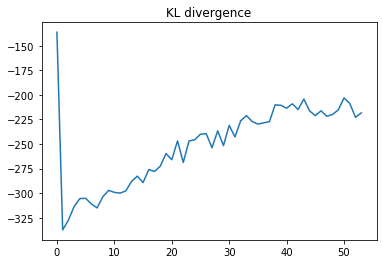

In [7]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

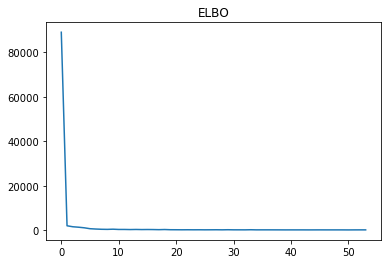

In [8]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


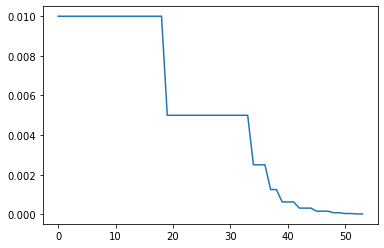

In [9]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


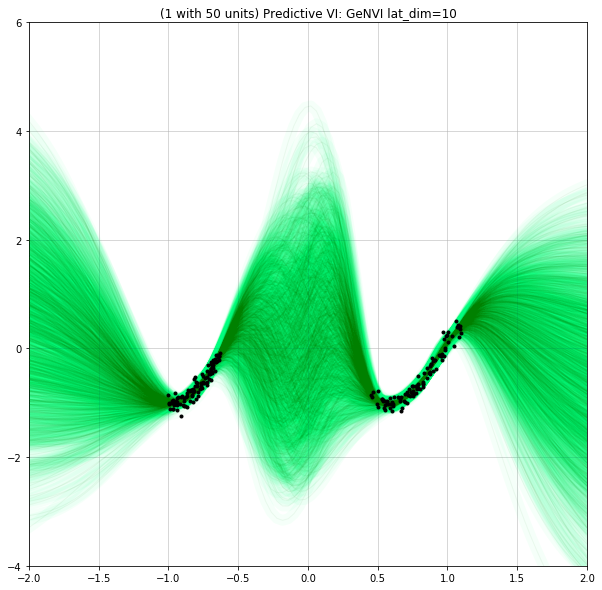

[tensor(160.3944, device='cuda:0'),
 tensor(-205.4613, device='cuda:0'),
 tensor(-129.8078, device='cuda:0')]

In [13]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('('+str(nblayers)+' with '+str(layerwidth)+' units) Predictive VI: GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

    
show(GeN,1000)
scores

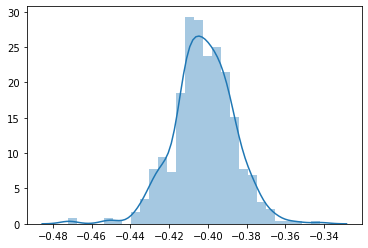

In [22]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

X=torch.Tensor([[-.7]]).to(device)#torch.arange(-2.,2.,0.1)
Y=model(X,GeN(500).detach()).squeeze().cpu()

sns.distplot(Y)

In [14]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [15]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.8674), tensor(0.6742))
SE_valid: (tensor(0.0102), tensor(0.0145))
nLPP_test: (tensor(0.2972), tensor(0.9900))
SE_test: (tensor(0.1923), tensor(0.2653))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$